In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd

In [7]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [9]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [11]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [15]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [16]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [17]:
#Max Date
engine.execute('''SELECT max(date) FROM measurement''').fetchall()

[('2017-08-23',)]

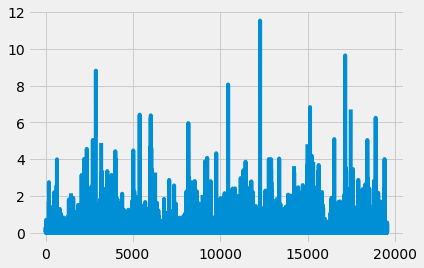

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

engine.execute('''SELECT date, prcp FROM measurement 
                WHERE date BETWEEN '2016-08-23' AND '2017-08-23' ''').fetchall()


# Perform a query to retrieve the data and precipitation scores
connection = engine.connect()
df = pd.read_sql('''SELECT * FROM measurement m;''', connection)
df.head()


# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

date_df = df.set_index('date')[['prcp']]
datesort_df = date_df.sort_values('date')
datesort_df.head()

# Use Pandas Plotting with Matplotlib to plot the data

plt.plot(datesort_df['prcp'].tolist())
plt.show()

![precipitation](Images/precipitation.png)

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
datesort_df['prcp'].describe()

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64

![describe](Images/describe.png)

In [20]:
# Design a query to show how many stations are available in this dataset?
df_station = pd.read_sql('''SELECT * FROM station s;''', connection)
df_station['station'].count()

9

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
df.groupby('station').count().sort_values('id',ascending = False)['prcp']

station
USC00519281    2772
USC00519397    2685
USC00513117    2696
USC00519523    2572
USC00516128    2484
USC00514830    1937
USC00511918    1932
USC00517948     683
USC00518838     342
Name: prcp, dtype: int64

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
df_m = pd.read_sql('''SELECT * FROM measurement WHERE station = 'USC00519281';''', connection)
max_t = df_m['tobs'].max()
min_t = df_m['tobs'].min()
mean_t = round(df_m['tobs'].mean(),2)

print(f'For USC00519281, Max Temp: {max_t}, Min Temp: {min_t}, Mean Temp: {mean_t}')

For USC00519281, Max Temp: 85.0, Min Temp: 54.0, Mean Temp: 71.66


In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df_m['date'].max()

'2017-08-18'

In [24]:

df_mtemp = pd.read_sql('''SELECT * FROM measurement 
                            WHERE (station = 'USC00519281' AND date BETWEEN '2016-08-18' AND '2017-08-18');''', connection)
df_mtemp.head()

,id,station,date,prcp,tobs
0,14603,USC00519281,2016-08-18,0.00,80.0
1,14604,USC00519281,2016-08-19,0.31,79.0
2,14605,USC00519281,2016-08-20,0.13,81.0
3,14606,USC00519281,2016-08-21,0.08,79.0
4,14607,USC00519281,2016-08-22,2.32,78.0


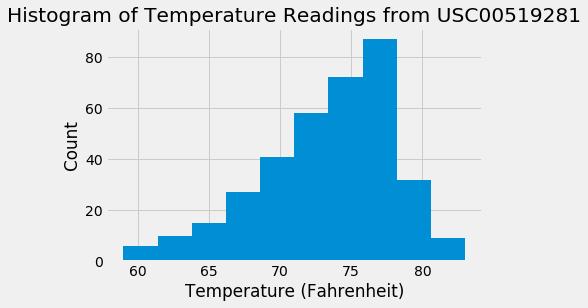

In [25]:
temp_list = df_mtemp['tobs'].tolist()
n_bins = 10

plt.hist(temp_list, bins = n_bins)
plt.title('Histogram of Temperature Readings from USC00519281')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Count')
plt.show()

![precipitation](Images/station-histogram.png)

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps('2017-07-01','2017-07-09')

[(71.0, 78.1923076923077, 87.0)]

In [29]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.show()

In [30]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
